In [1]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra
using CairoMakie, GLMakie

In [3]:
function get_eigen(u, p, jac_system, t = 0.0)
    Ju = jac_system(u, p, t)
    ei_u = eigen(Ju)
    return (fp = u, ei = ei_u)
end
function show_fp_eigen(data)
    println("fixed point: $(data.fp)")
    println("---------------------------------------------------")
    println("eigenvalues: $(data.ei.values)")
    println("---------------------------------------------------")
    println("eigenvectors:")
    show(stdout, "text/plain", data.ei.vectors); println()
    println("---------------------------------------------------"); println()
end
function shift_vec(eifp, col; ϵ = 1e-6, sign_ = +)
    sign_(eifp.fp, real(eifp.ei.vectors[:, 1]) * ϵ)
end;

In [4]:
t = 500.0; tt = 600.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

E = interval(-40, 40); x = interval(0, 1); y = interval(0, 1)
box = IntervalBox(E, x, y);

In [5]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305;

In [99]:
U0, I0 = 0.24, -1.3
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

In [100]:
u0 = SA[7.485044731286254, 0.771932479798953, 0.5235934863993938]
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)
fp, _, _ = fixedpoints(ds, box, jacob_TM_)
println("count of fixed points: $(length(fp))");
tr, trange = trajectory(ds, t, Δt = tstep);

count of fixed points: 1

In [103]:
eifp = get_eigen(fp[1], p, jacob_TM_)
show_fp_eigen(eifp);

fixed point: [8.748249812198836, 0.7385478206869154, 0.4385582459951177]
---------------------------------------------------
eigenvalues: ComplexF64[-5.956699004205809 + 0.0im, -0.1290142377420571 - 14.802912757537605im, -0.1290142377420571 + 14.802912757537605im]
---------------------------------------------------
eigenvectors:
3×3 SMatrix{3, 3, ComplexF64, 9} with indices SOneTo(3)×SOneTo(3):
    0.99887+0.0im     -0.99985-0.0im           -0.99985+0.0im
 -0.0459788+0.0im     0.013353+0.0108821im     0.013353-0.0108821im
  0.0120402+0.0im  -0.00107252+0.0013481im  -0.00107252-0.0013481im
---------------------------------------------------



In [78]:
eifp = get_eigen(fp[2], p, jacob_TM_)
show_fp_eigen(eifp);

fixed point: [2.47825624869664, 0.9010871849957391, 0.9440113560275039]
---------------------------------------------------
eigenvalues: [-8.803309042622615, -0.30303030301953365, 11.34772490427855]
---------------------------------------------------
eigenvectors:
3×3 SMatrix{3, 3, Float64, 9} with indices SOneTo(3)×SOneTo(3):
  0.995201    -1.207e-9     -0.999804
 -0.0978049    4.05211e-11   0.0197861
  0.00305799   1.0           0.000451351
---------------------------------------------------



In [79]:
eifp = get_eigen(fp[3], p, jacob_TM_)
show_fp_eigen(eifp);

fixed point: [8.283843454105506, 0.7405406724456021, 0.44831548820548406]
---------------------------------------------------
eigenvalues: ComplexF64[-4.9153019282947605 + 0.0im, 1.4221742504122428 - 13.07283744797389im, 1.4221742504122428 + 13.07283744797389im]
---------------------------------------------------
eigenvectors:
3×3 SMatrix{3, 3, ComplexF64, 9} with indices SOneTo(3)×SOneTo(3):
  0.999102+0.0im     0.999841-0.0im            0.999841+0.0im
 -0.040321+0.0im    -0.014721-0.0098185im     -0.014721+0.0098185im
 0.0129965+0.0im  0.000880313-0.00179026im  0.000880313+0.00179026im
---------------------------------------------------



In [104]:
lb_size = 35; tck_size = 30; dis = 60;

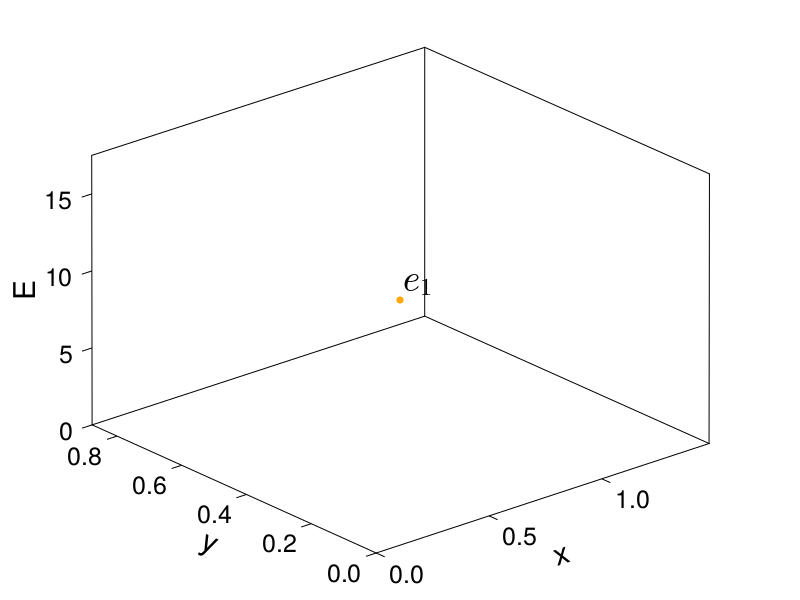

CairoMakie.Screen{IMAGE}


In [105]:
ts, tf = 200000, 300000
idx, idy, idz = 2, 3, 1
lb_size = 30; tck_size = 25;
textsize = 40
CairoMakie.activate!()
f = Figure(resolution = (800, 600), title = "?")
axis3_1 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)

              
lines!(axis3_1, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
linewidth = 2.0, linestyle = :solid, color = :black)

scatter!(axis3_1, fp[1][2], fp[1][3], fp[1][1], markersize = 10, color = :orange)
text!(axis3_1, fp[1][2], fp[1][3], fp[1][1], text = L"e_1", fontsize = textsize)

"""scatter!(axis3_1, fp[2][2], fp[2][3], fp[2][1], markersize = 10, color = :red)
text!(axis3_1, fp[2][2], fp[2][3], fp[2][1], text = L"e_2", fontsize = textsize)

scatter!(axis3_1, fp[3][2], fp[3][3], fp[3][1], markersize = 10, color = :orange)
text!(axis3_1, fp[3][2], fp[3][3], fp[3][1], text = L"e_3", fontsize = textsize)"""

display(f)

In [106]:
pathtosave = "C:\\Users\\Alex\\Desktop\\TM images"
filename = "\\stable_fp.eps"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{EPS}


In [12]:
"""tss, tfs = 1, 500000
ts, tf = 1, 500000
GLMakie.activate!()
idx, idy, idz = 2, 3, 1
f = Figure(resolution = (900, 600))
ax = LScene(f[1, 1], show_axis = true)
scale!(ax.scene, 50, 50, 1)

lines!(ax, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
        linewidth = 1.0, linestyle = :solid, color = :blue)

lines!(ax, trshift[tss: tfs, idx], trshift[tss: tfs, idy], trshift[tss: tfs, idz],
        linewidth = 1.0, linestyle = :solid, color = :red)

for point in fp
        scatter!(ax, point[2], point[3], point[1], markersize = 8, color = :orange)
end

display(GLMakie.Screen(), f);"""

"tss, tfs = 1, 500000\nts, tf = 1, 500000\nGLMakie.activate!()\nidx, idy, idz = 2, 3, 1\nf = Figure(resolution = (900, 600))\nax = LScene(f[1, 1], show_axis = true)\nscale!(ax.scene, 50, 50, 1)\n\nlines!(ax, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],\n        linewidth = 1.0," ⋯ 43 bytes ⋯ "(ax, trshift[tss: tfs, idx], trshift[tss: tfs, idy], trshift[tss: tfs, idz],\n        linewidth = 1.0, linestyle = :solid, color = :red)\n\nfor point in fp\n        scatter!(ax, point[2], point[3], point[1], markersize = 8, color = :orange)\nend\n\ndisplay(GLMakie.Screen(), f);"